In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
module_path = os.path.abspath(os.path.join('..\\Spyder'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [3]:
from Spyder.trees import kd_tree
from Spyder.trees import quad_tree
from Spyder import tsne


## KL divergence

In [305]:
def make_binom_distribution(n, p, size):
    
    x = np.random.binomial(n, p, size)
    p_x = np.zeros(n + 1)
    for obs in x:
        p_x[obs] += 1

    for i in range(p_x.shape[0]):
        if p_x[i] == 0:
            p_x[i] = 0.0001
            
    p_x = p_x / np.sum(p_x)
    return p_x

In [306]:
n = 10
p = 0.4
size = 1000
p_x = make_binom_distribution(n, p, size)

In [307]:
variance = 0.05
eps = variance * np.random.randn(n + 1)

In [308]:
p_x_ =  p_x + eps
p_x_[p_x_< 0] = 0.001
p_x_ = p_x_/np.sum(p_x_)

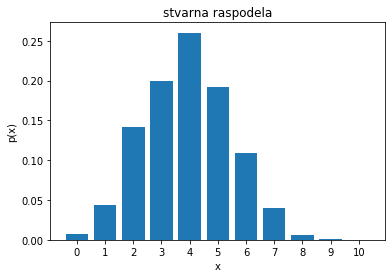

In [315]:
plt.title('stvarna raspodela')
plt.bar(range(p_x.shape[0]), p_x)
plt.xticks(range(n+1))
plt.xlabel('x')
plt.ylabel('p(x)')
plt.show()

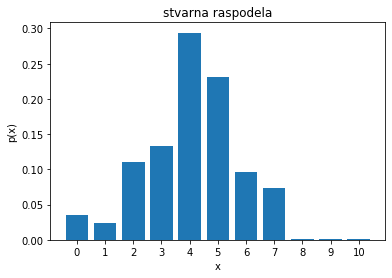

In [316]:
plt.title('stvarna raspodela')
plt.bar(range(p_x_.shape[0]), p_x_)
plt.xticks(range(n+1))
plt.xlabel('x')
plt.ylabel('p(x)')
plt.show()

In [311]:
def kl_divergence(p,q):
    kl = 0
    for i in range(p.shape[0]):

        if p[i] == 0:
            kl += 0
        elif q[i] == 0:
            return np.inf
        else:
            kl+= p[i] * np.log(p[i]/q[i])
    return kl

In [312]:
step_p = 0.01
p_arr = np.arange(0,1 + step_p,step_p)
kl_arr = np.zeros(p_arr.shape[0])
for i, p in enumerate(p_arr):
    q_x = make_binom_distribution(n, p, size)
    kl_arr[i] = kl_divergence(p_x_,q_x)

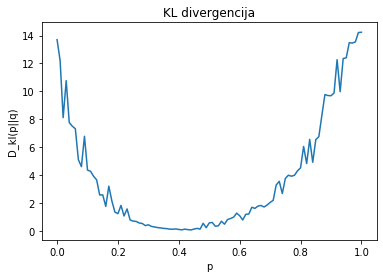

In [318]:
plt.title('KL divergencija')
plt.plot(p_arr, kl_arr)
plt.xlabel('p')
plt.ylabel('D_kl(p||q)')
plt.show()

In [322]:
p = p_arr[np.argmin(kl_arr)]
print(p)
q_x = make_binom_distribution(n, p, size)

0.44


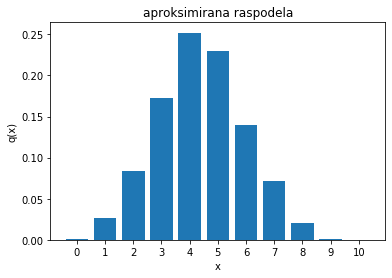

In [323]:
plt.title('aproksimirana raspodela')
plt.bar(range(q_x.shape[0]), q_x)
plt.xticks(range(n+1))
plt.xlabel('x')
plt.ylabel('q(x)')
plt.show()

## K-d tree

In [20]:
np.random.seed(50)
num_class = 50
mean = np.array([1,1])
cov =  np.array([[1, 0.2],[0.2, 1]])
X = np.random.multivariate_normal(mean, cov, num_class)
index_arr = np.array([1, 2, 3 , 4])
arr = np.array([5, 2, 1, 6, 7 , 9, 18, 1]).reshape(-1,1)

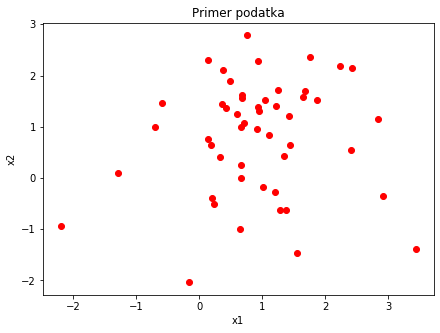

In [21]:
plt.figure(figsize = (7,5))
plt.plot(X[:,0], X[:,1], 'ro')
plt.title('Primer podatka')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [22]:
kd_tree2 = kd_tree.KDTree(X, leaf_size=10)

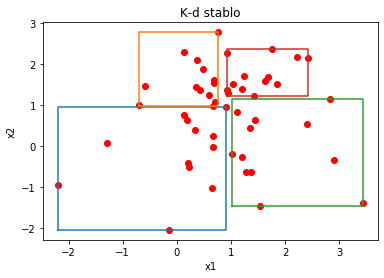

In [23]:
kd_tree2.visualize_bounds()

## Quad tree

In [5]:
np.random.seed(50)
num_class = 50
mean = np.array([1,1])
cov =  np.array([[1, 0.2],[0.2, 1]])
X = np.random.multivariate_normal(mean, cov, num_class)
index_arr = np.array([1, 2, 3 , 4])
arr = np.array([5, 2, 1, 6, 7 , 9, 18, 1]).reshape(-1,1)

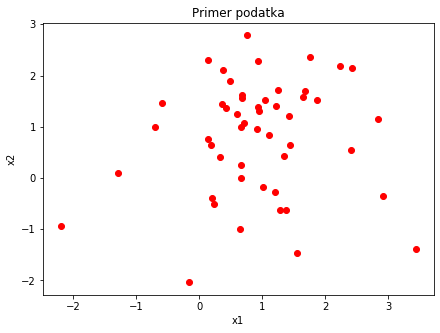

In [6]:
plt.figure(figsize = (7,5))
plt.plot(X[:,0], X[:,1], 'ro')
plt.title('Primer podatka')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [7]:
qt = quad_tree.QuadTree()

In [8]:
qt.build_tree(X)

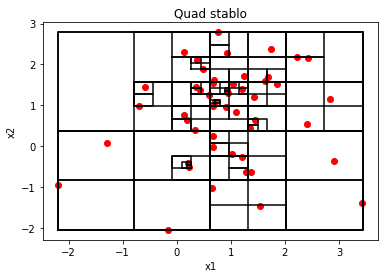

In [9]:
plt.plot(X[:,0], X[:,1], 'ro')
qt.visualize_bounds()

## t-SNE

In [4]:
np.random.seed(50)
num_class_1 = 150
num_class_2 = 150

# first class Gauss 2d
mean1 = np.array([1,1])
cov1 =  np.array([[1, 0.2],[0.2, 1]])
X1 = np.random.multivariate_normal(mean1, cov1, num_class_1)
y1 = np.zeros((num_class_1))

# second class Gauss 2d
mean2 = np.array([10,1])
cov2 =  np.array([[0.05, 0],[0, 0.05]])
X2 = np.random.multivariate_normal(mean2, cov2, num_class_2)
y2 = np.ones((num_class_2))

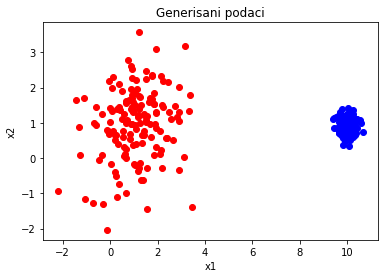

In [5]:
plt.plot(X1[:,0], X1[:,1], 'ro')
plt.plot(X2[:,0], X2[:,1], 'bo')
plt.title('Generisani podaci')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [6]:
X = np.concatenate((X1, X2), axis = 0)
y = np.concatenate((y1, y2), axis = 0)

perplexity tuning

[t-SNE] Mean sigma: 0.028502555666464632
[t-SNE] KL divergence after 250 iterations: 21.489860474171753
[t-SNE] KL divergence after 1000 iterations: 0.8872804917107356
[t-SNE] Mean sigma: 0.05978405783901414
[t-SNE] KL divergence after 250 iterations: 14.258199284779487
[t-SNE] KL divergence after 1000 iterations: 0.6674197205795865
[t-SNE] Mean sigma: 0.16460794883746055
[t-SNE] KL divergence after 250 iterations: 10.435084277536006
[t-SNE] KL divergence after 1000 iterations: 0.5791427406835079
[t-SNE] Mean sigma: 0.22429516448738795
[t-SNE] KL divergence after 250 iterations: 9.187985442298087
[t-SNE] KL divergence after 1000 iterations: 0.4226768296881626
[t-SNE] Mean sigma: 7.651679860294005
[t-SNE] KL divergence after 250 iterations: 6.250730873171199
[t-SNE] KL divergence after 251 iterations: nan


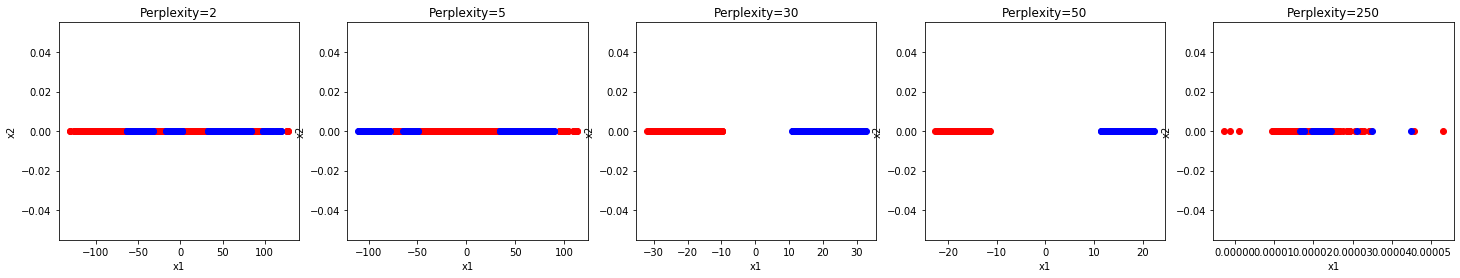

In [18]:
perplexity_arr= [2, 5, 30, 50, 250]
fig = plt.figure(figsize= (25,4))
for i, perplexity in enumerate(perplexity_arr):
    plt.subplot(1,len(perplexity_arr),i+1)
    X_trans = tsne.TSNE(X, n_components = 1, perplexity = perplexity, n_iter = 1000, early_exaggeration = 4, method = "exact", random_state = 1, verbose = 1)
    plt.plot(X_trans[np.where(y == 0)], np.zeros(len(X_trans[np.where(y == 0)])), 'ro')
    plt.plot(X_trans[np.where(y == 1)], np.zeros(len(X_trans[np.where(y == 1)])), 'bo')
    plt.title('Perplexity='+str(perplexity))
    plt.xlabel('x1')
    plt.ylabel('x2')
plt.show()

number of iteration tuning

[t-SNE] Mean sigma: 0.195047616122642
[t-SNE] KL divergence after 250 iterations: 9.742680958807302
[t-SNE] KL divergence after 250 iterations: 9.742680958807302
[t-SNE] Mean sigma: 0.195047616122642
[t-SNE] KL divergence after 250 iterations: 9.742680958807302
[t-SNE] KL divergence after 300 iterations: 0.5141356208321305
[t-SNE] Mean sigma: 0.195047616122642
[t-SNE] KL divergence after 250 iterations: 9.742680958807302
[t-SNE] KL divergence after 700 iterations: 0.49372692582149236
[t-SNE] Mean sigma: 0.195047616122642
[t-SNE] KL divergence after 250 iterations: 9.742680958807302
[t-SNE] KL divergence after 900 iterations: 0.49270166373956703
[t-SNE] Mean sigma: 0.195047616122642
[t-SNE] KL divergence after 250 iterations: 9.742680958807302
[t-SNE] KL divergence after 1000 iterations: 0.49235888197044103


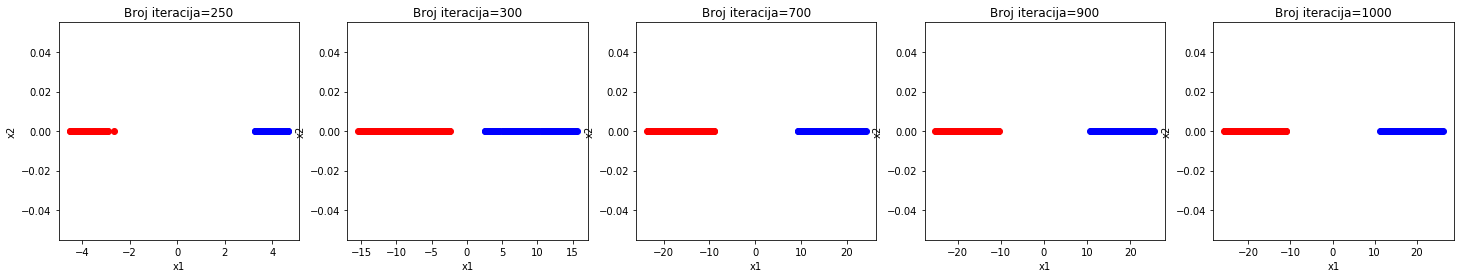

In [16]:
n_iter_arr= [250, 300, 700, 900, 1000]
fig = plt.figure(figsize= (25,4))
for i, n_iter in enumerate(n_iter_arr):
    plt.subplot(1,len(perplexity_arr),i+1)
    X_trans = tsne.TSNE(X, n_components = 1, perplexity = 40, n_iter = n_iter, early_exaggeration = 4, method = "exact", random_state = 1, verbose = 1)
    plt.plot(X_trans[np.where(y == 0)], np.zeros(len(X_trans[np.where(y == 0)])), 'ro')
    plt.plot(X_trans[np.where(y == 1)], np.zeros(len(X_trans[np.where(y == 1)])), 'bo')
    plt.title('Broj iteracija='+str(n_iter))
    plt.xlabel('x1')
    plt.ylabel('x2')
plt.show()